In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [9]:
file_path = '/content/sentimentdataset.csv'
df = pd.read_csv(file_path)

In [10]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [11]:
df['Sentiment'] = df['Sentiment'].str.strip()
df['Platform'] = df['Platform'].str.strip().str.capitalize()
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
df.isnull().sum()

,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0
Country,0
Year,0


<ipython-input-12-ed280e67455c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=filtered_df["Sentiment"], palette="viridis", order=top_20_sentiments)


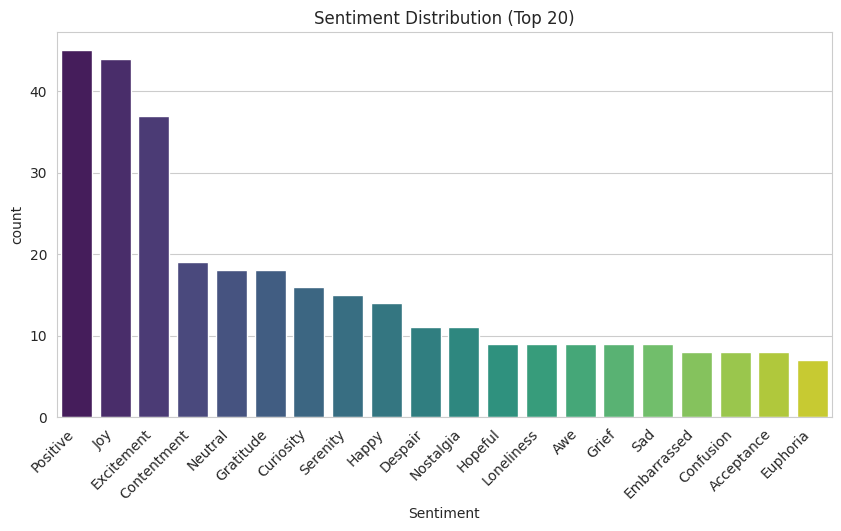

In [12]:
sns.set_style("whitegrid")
top_20_sentiments = df["Sentiment"].value_counts().nlargest(20).index
filtered_df = df[df["Sentiment"].isin(top_20_sentiments)]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

sns.countplot(x=filtered_df["Sentiment"], palette="viridis", order=top_20_sentiments)
plt.title("Sentiment Distribution (Top 20)")
plt.xticks(rotation=45, ha="right")

plt.show()

<ipython-input-13-432d426e5902>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Platform"], palette="pastel")


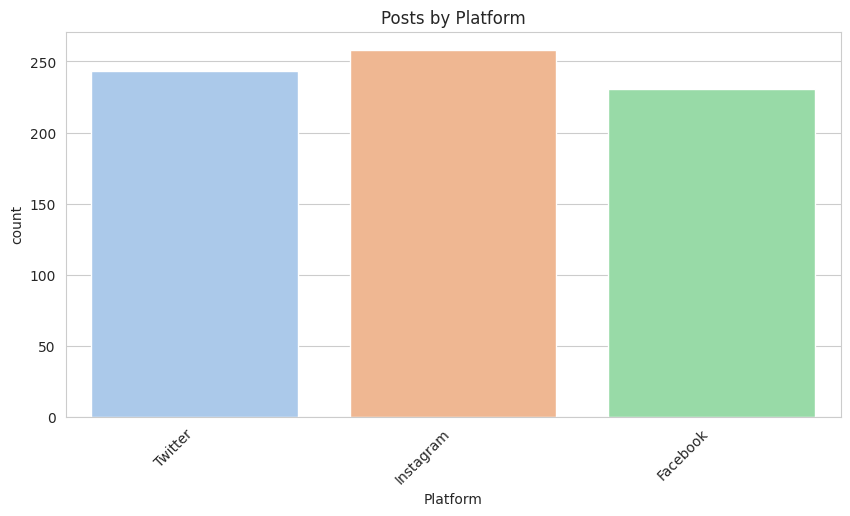

In [13]:
plt.figure(figsize=(10, 5))

sns.countplot(x=df["Platform"], palette="pastel")
plt.title("Posts by Platform")
plt.xticks(rotation=45, ha="right")

plt.show()

Filter sentiments "Positive" and "Negative"


<ipython-input-14-108a8d557ec7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Likes', data=df_filtered, palette={'Positive': 'green', 'Negative': 'red'})


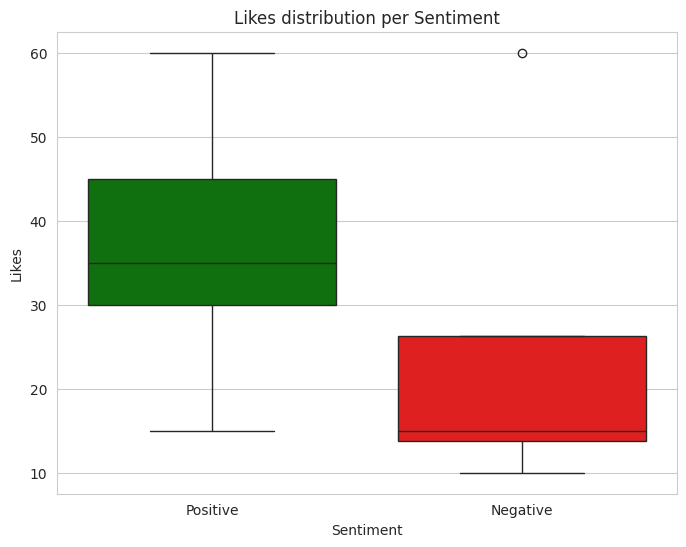

In [14]:
df_filtered = df[df['Sentiment'].isin(['Positive', 'Negative'])]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Likes', data=df_filtered, palette={'Positive': 'green', 'Negative': 'red'})

plt.title('Likes distribution per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Likes')

plt.show()

<ipython-input-15-58dc4d15b979>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['Hour'], y=df['Likes'], estimator='mean', ci=None)


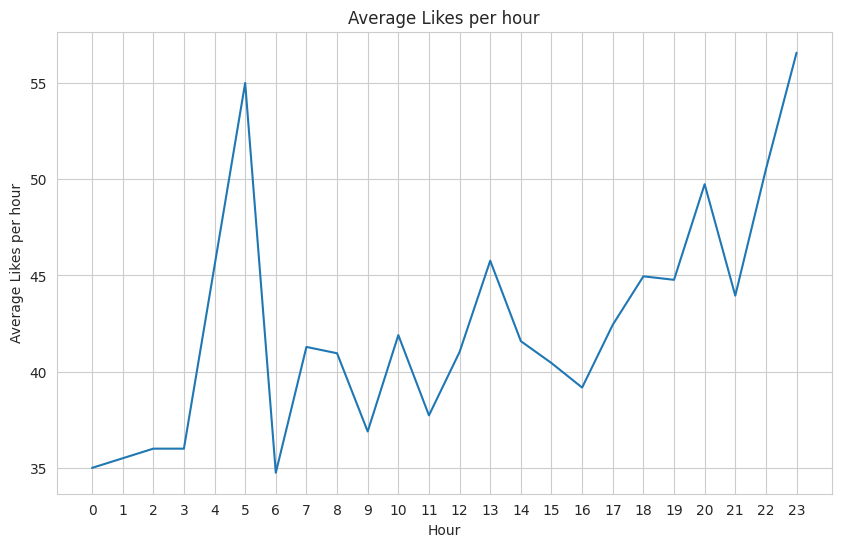

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['Hour'], y=df['Likes'], estimator='mean', ci=None)
plt.title("Average Likes per hour")
plt.xlabel("Hour")
plt.ylabel("Average Likes per hour")
plt.xticks(range(0, 24))
plt.show()

<ipython-input-16-7e58e3432d0a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Platform'], y=df['Likes'], estimator='mean', palette="Set2")


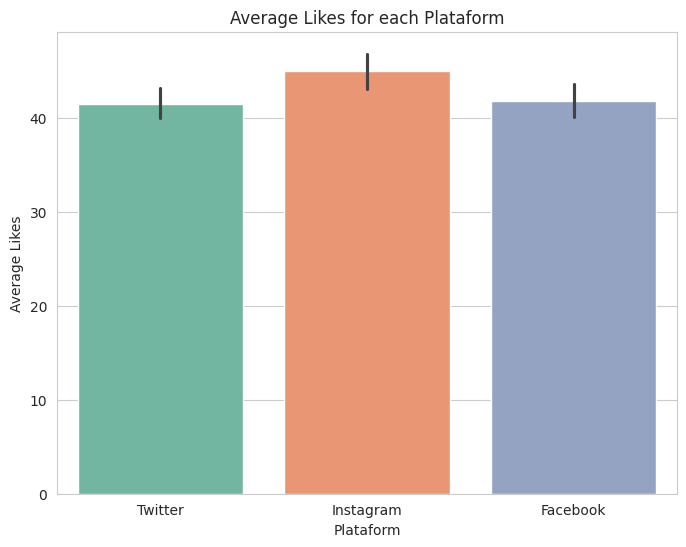

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Platform'], y=df['Likes'], estimator='mean', palette="Set2")
plt.title("Average Likes for each Plataform")
plt.xlabel("Plataform")
plt.ylabel("Average Likes")
plt.show()

<ipython-input-17-c9597a47ea2b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


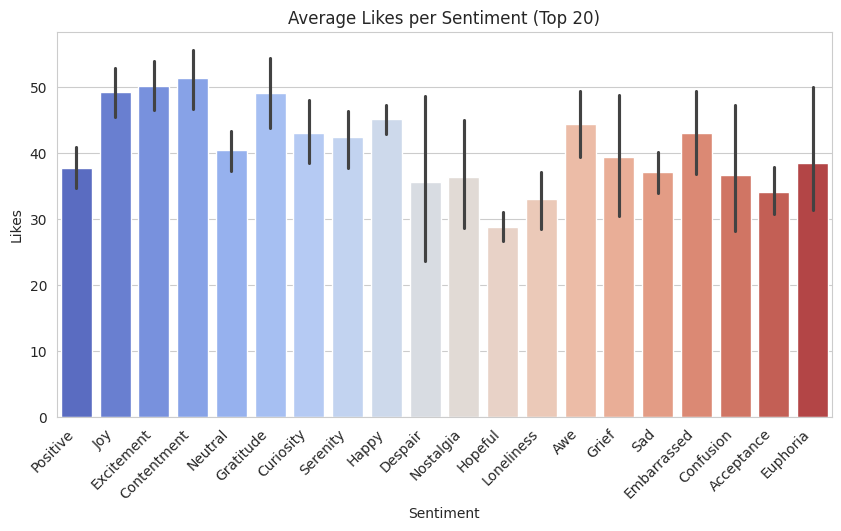

In [17]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x=filtered_df["Sentiment"],
    y=filtered_df["Likes"],
    palette="coolwarm",
    order=top_20_sentiments
)
plt.title("Average Likes per Sentiment (Top 20)")
plt.xticks(rotation=45, ha="right")

plt.show()

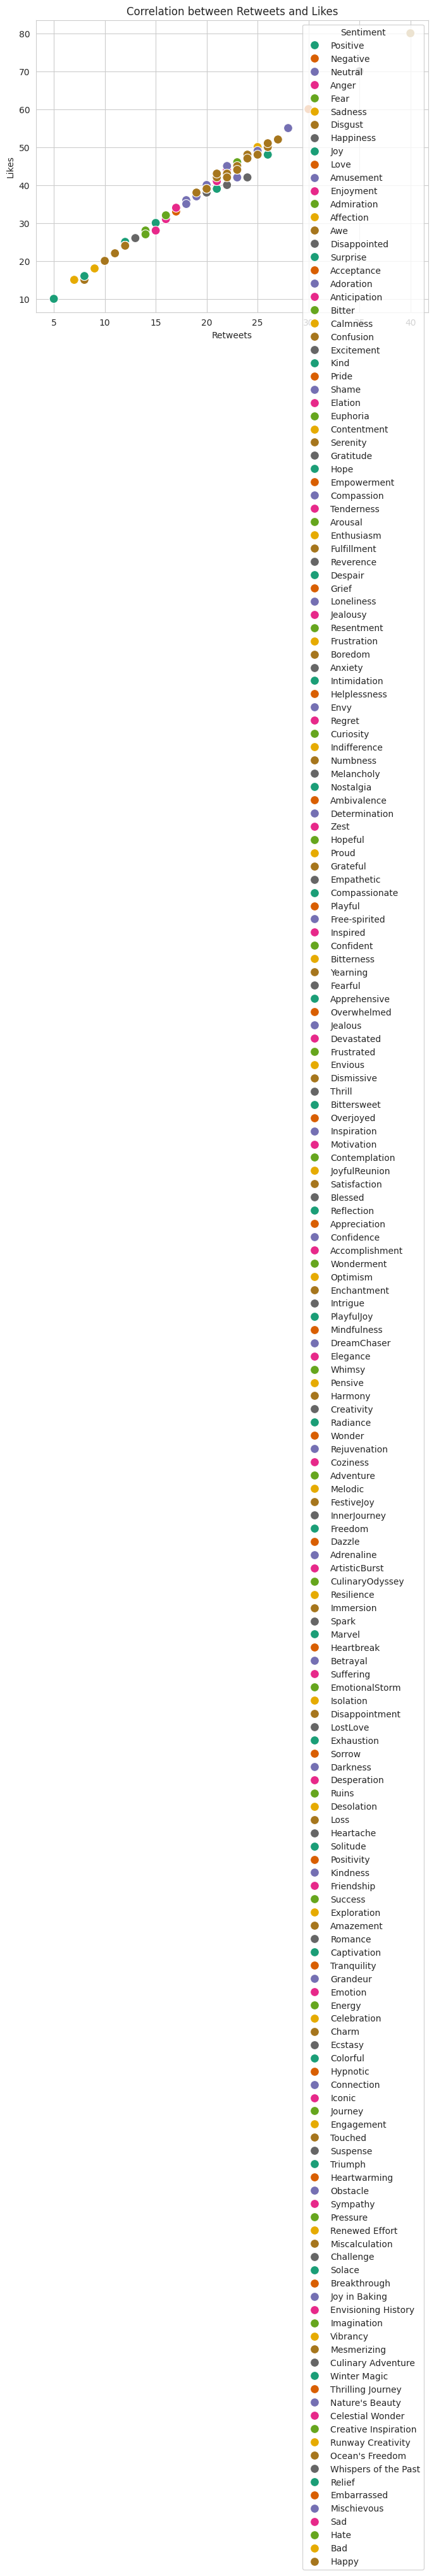

In [18]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df["Retweets"], y=df["Likes"], hue=df["Sentiment"], palette="Dark2", s=100)
plt.title("Correlation between Retweets and Likes")

plt.show()

In [20]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


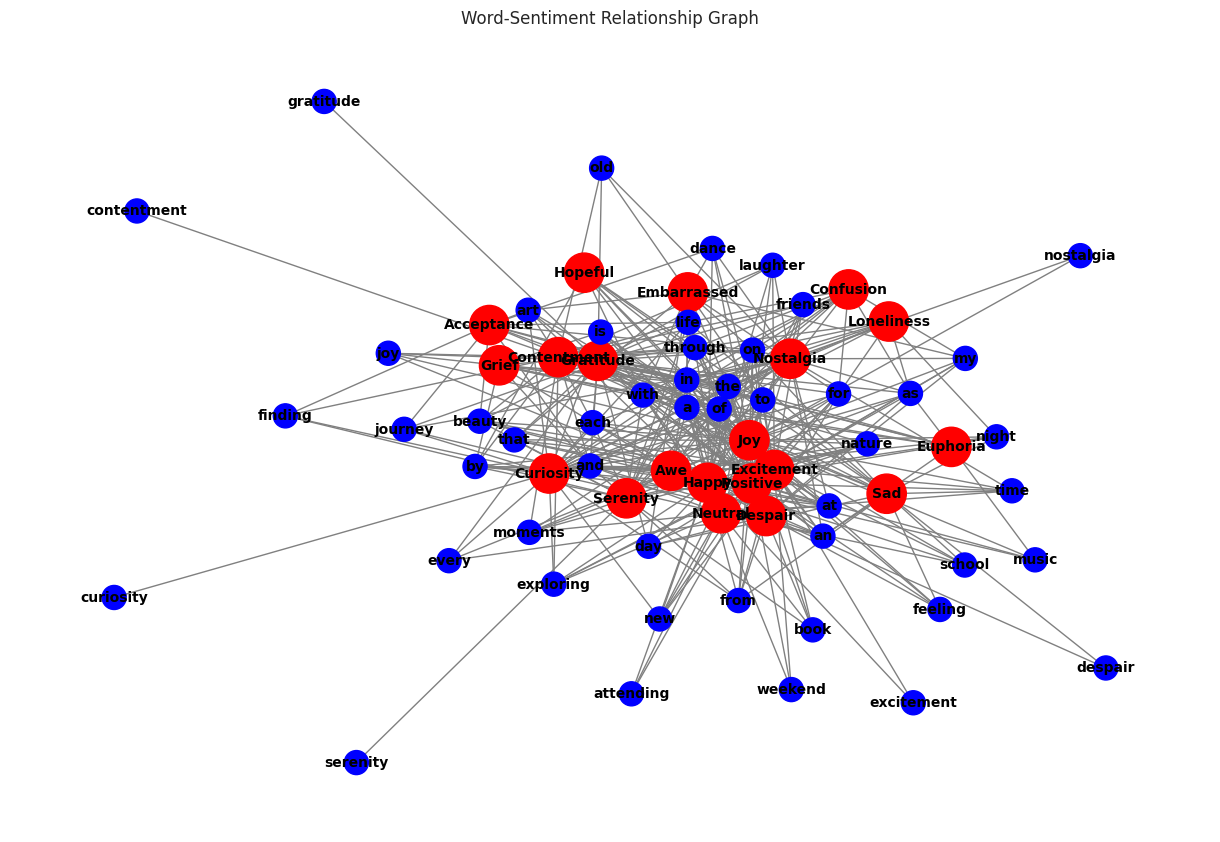

In [21]:
nltk.download('punkt')
G = nx.Graph()
word_sentiment_edges = []
word_counts = Counter()

for _, row in filtered_df.iterrows():
    words = word_tokenize(row["Text"].lower())
    sentiment = row["Sentiment"]

    for word in words:
        if word.isalpha():
            word_counts[word] += 1
            word_sentiment_edges.append((word, sentiment))
top_words = [word for word, count in word_counts.most_common(50)]
for sentiment in top_20_sentiments:
    G.add_node(sentiment, color="red", size=800)

for word in top_words:
    G.add_node(word, color="blue", size=300)
for word, sentiment in word_sentiment_edges:
    if word in top_words:
        G.add_edge(word, sentiment)
node_colors = [G.nodes[node]["color"] for node in G.nodes()]
node_sizes = [G.nodes[node]["size"] for node in G.nodes()]
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization

nx.draw(
    G, pos, with_labels=True, node_color=node_colors,
    node_size=node_sizes, edge_color="gray", font_size=10, font_weight="bold"
)

plt.title("Word-Sentiment Relationship Graph")
plt.show()

In [22]:
X = df['Text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [23]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

Accuracy: 0.22
                      precision    recall  f1-score   support

          Acceptance       1.00      0.50      0.67         2
          Admiration       0.00      0.00      0.00         2
           Affection       0.00      0.00      0.00         1
         Ambivalence       0.00      0.00      0.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         3
                 Awe       0.00      0.00      0.00         2
                 Bad       0.00      0.00      0.00         1
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       0.00      0.00      0.00         1
         Bittersweet       0.00      0.00      0.00         1
             Boredom       0.00      0.00      0.00         1
            Calmness       0.00      0.00      0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

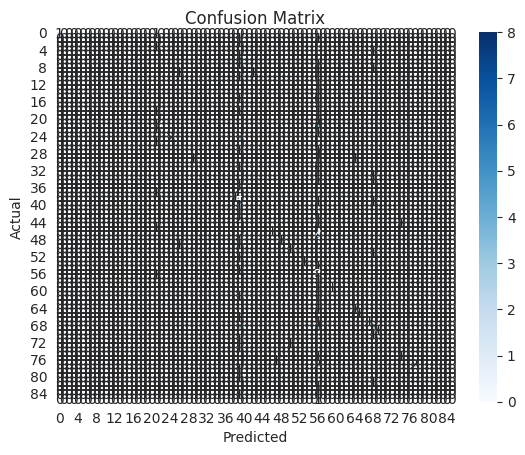

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

TF-IDF Vectorization

In [30]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


LogisticRegression

In [29]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.42
                      precision    recall  f1-score   support

          Acceptance       1.00      1.00      1.00         2
          Admiration       0.00      0.00      0.00         2
           Affection       0.00      0.00      0.00         1
         Ambivalence       0.00      0.00      0.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         3
                 Awe       0.00      0.00      0.00         2
                 Bad       0.00      0.00      0.00         1
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       0.00      0.00      0.00         1
         Bittersweet       0.00      0.00      0.00         1
             Boredom       0.00      0.00      0.00         1
            Calmness       0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Train Random Forest

In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.42
                      precision    recall  f1-score   support

          Acceptance       0.67      1.00      0.80         2
      Accomplishment       0.00      0.00      0.00         0
          Admiration       0.00      0.00      0.00         2
           Affection       0.00      0.00      0.00         1
         Ambivalence       0.50      1.00      0.67         1
           Amusement       0.00      0.00      0.00         0
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         1
             Arousal       1.00      0.33      0.50         3
       ArtisticBurst       0.00      0.00      0.00         0
                 Awe       0.20      0.50      0.29         2
                 Bad       1.00      1.00      1.00         1
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       1.00      1.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

prediction

In [27]:
def predict_sentiment(text):
  text_vec = vectorizer.transform([text])
  prediction = model.predict(text_vec)
  return prediction[0]

Predicted sentiment for 'This is a great product!': Positive


In [31]:
input_text = input("enter chat")
predicted_sentiment = predict_sentiment(input_text)
print(f"Predicted sentiment for '{input_text}': {predicted_sentiment}")

enter chatJust finished an amazing workout! 💪
Predicted sentiment for 'Just finished an amazing workout! 💪': Joy
